In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
import torch
from torch import nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader


In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

print(f"using PyTorch version: {torch.__version__}, Device: {device}")

using PyTorch version: 2.2.2+cu118, Device: cuda


In [4]:
print(len(tfds.list_builders()))

413


In [5]:
data, info = tfds.load('horses_or_humans', with_info=True)
data.keys()

dict_keys(['train', 'test'])

In [6]:
ds_train = data['train']
print(len(ds_train))

1027


In [7]:
ds_train = ds_train.map(lambda x :(tf.image.resize(x['image'], (224, 224)), x['label']))
# print(ds_train.shape, ds_train.dtype)  '_MapDataset' object has no attribute 'shape'

ds_train = ds_train.shuffle(200).batch(1027)
# print(ds_train.shape, ds_train.dtype) '_BatchDataset' object has no attribute 'shape'

train_batch = next(iter(ds_train))
# print(batch.shape, batch.dtype)  'tuple' object has no attribute 'shape'

print(train_batch[0].shape, type(train_batch[0]), train_batch[1].shape, type(train_batch[1]))

x_train, y_train = train_batch
print(x_train.shape, type(x_train), y_train.shape, type(y_train))

(1027, 224, 224, 3) <class 'tensorflow.python.framework.ops.EagerTensor'> (1027,) <class 'tensorflow.python.framework.ops.EagerTensor'>
(1027, 224, 224, 3) <class 'tensorflow.python.framework.ops.EagerTensor'> (1027,) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [8]:
# images, labels = batch
# print(images.shape, type(images))
# print(labels.shape, type(labels))

In [9]:
ds_test = data['test']
print(len(ds_test))

256


In [10]:
ds_test = ds_test.map(lambda x :(tf.image.resize(x['image'], (224, 224)), x['label']))
ds_test = ds_test.shuffle(40).batch(256)
test_batch = next(iter(ds_test))
print(test_batch[0].shape, type(test_batch[0]), test_batch[1].shape, type(test_batch[1]))

x_test, y_test = test_batch 
print(x_test.shape, type(x_test), y_test.shape, type(y_test))

(256, 224, 224, 3) <class 'tensorflow.python.framework.ops.EagerTensor'> (256,) <class 'tensorflow.python.framework.ops.EagerTensor'>
(256, 224, 224, 3) <class 'tensorflow.python.framework.ops.EagerTensor'> (256,) <class 'tensorflow.python.framework.ops.EagerTensor'>


(1027, 224, 224, 3) <class 'numpy.ndarray'> (1027,) <class 'numpy.ndarray'>


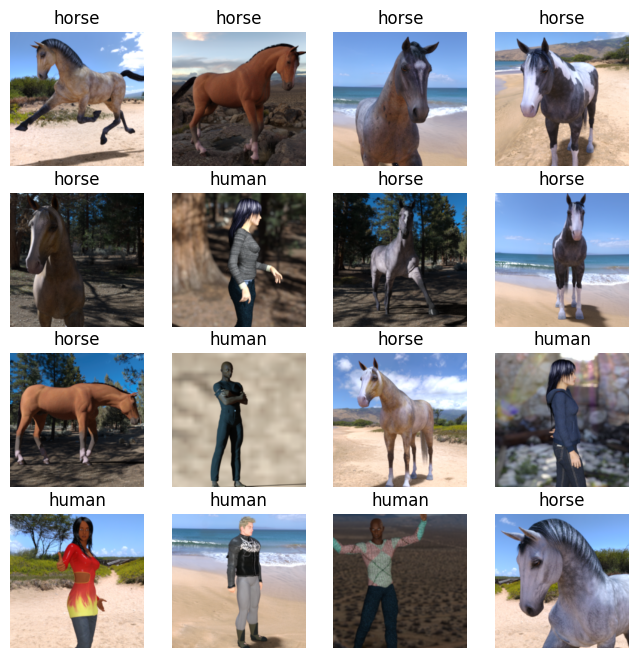

In [11]:
# 그림을 그려보기 위해서 numpy()로 바꾸고

import matplotlib.pyplot as plt
import numpy as np

images = np.array(x_train)/ 255
labels = np.array(y_train)
print(images.shape, type(images), labels.shape, type(labels))

label_map = {0 : 'horse', 1 : 'human'}

plt.figure(figsize=(8, 8))

random_idx = np.random.randint(0, len(images), size=16)

for i, idx in enumerate(random_idx):
    img = images[idx]
    label_idx = labels[idx]
    label = label_map[label_idx]

    plt.subplot(4, 4, i+1)
    plt.imshow(images[idx])
    plt.title(label)
    plt.axis('off')
plt.show()

In [12]:
# TensorFlow의 EagerTensor를 NumPy 배열로 변환한 후에 torch.Tensor로 변환하고 정규화
x_train = torch.tensor(x_train.numpy()) / 255
y_train = torch.tensor(y_train.numpy())
print(x_train.shape, type(x_train))


# TensorFlow의 EagerTensor를 NumPy 배열로 변환한 후에 torch.Tensor로 변환하고 정규화
x_test = torch.tensor(x_test.numpy()) /255
y_test = torch.tensor(y_test.numpy())
print(x_test.shape, type(x_test))

torch.Size([1027, 224, 224, 3]) <class 'torch.Tensor'>
torch.Size([256, 224, 224, 3]) <class 'torch.Tensor'>


In [13]:
import torch

# 입력 텐서
input_tensor = torch.randn(1027, 300, 300, 3)  # (배치 크기, 높이, 너비, 채널)

# 텐서의 차원을 변경
x_train = x_train.permute(0, 3, 1, 2)  # (배치 크기, 채널, 높이, 너비)
x_test =x_test .permute(0, 3, 1, 2)

print(x_train.shape, type(x_train))
print(x_test.shape, type(x_test))


torch.Size([1027, 3, 224, 224]) <class 'torch.Tensor'>
torch.Size([256, 3, 224, 224]) <class 'torch.Tensor'>


In [14]:
# # 토치텐서의 x_train, y_train을 합쳐서 train_dataset 를 만듣다

# from torch.utils.data import TensorDataset, DataLoader

# # x_train과 y_train을 TensorDataset으로 합침
# train_dataset = TensorDataset(x_train, y_train)
# test_dataset = TensorDataset(x_test, y_test)


In [15]:
# transform = transforms.Compose([transforms.ToTensor(),
#                                 transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

In [16]:


# class CustomDataset(Dataset):  # Dataset으로 수정
#     def __init__(self, images, labels, transform=None):
#         self.images = images
#         self.labels = labels
#         self.transform = transform

#     def __len__(self):
#         return len(self.images)

#     def __getitem__(self, idx):
#         image = self.images[idx]
#         label = self.labels[idx]

#         if self.transform:
#             image = self.transform(image)

#         return image, label

# # Transform 설정
# transform = transforms.Compose([transforms.ToTensor(),
#                                 transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
#                                 ])

# # DataLoader 생성
# train_dataset = CustomDataset(x_train, y_train, transform=transform)
# test_dataset = CustomDataset(x_test, y_test, transform=transform)


In [17]:
import torch
from torch.utils.data import Dataset, DataLoader

# dataset을 만들기 위해 

class CustomDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y

# 데이터셋 인스턴스 생성
train_dataset = CustomDataset(x_train, y_train)
test_dataset = CustomDataset(x_test, y_test)


In [18]:
# 데이터로더 생성
batch_size = 32

# Create data loaders.
train_dataset_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 데티터를 확인하고

for X, y in test_dataset_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}, {type(X)}, {y.dtype}")
    print(f"Shape of y: {y.shape},{type(y)}, {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([32, 3, 224, 224]), <class 'torch.Tensor'>, torch.int64
Shape of y: torch.Size([32]),<class 'torch.Tensor'>, torch.int64


In [19]:
# 그림은 그리기 우해 train_dataset_loader 를 불러와 

images, labels = next(iter(train_dataset_loader))
print(images.shape, type(images), labels.shape, type(labels))

# 이미지를 그릴수 있게, (64, 3, 300, 300) 을 (64, 300, 300, 3) 으로 바꾸어준다

images = images.permute(0, 2, 3, 1)
print(images.shape, type(images), labels.shape, type(labels))

# numpy() 로 바꾸나...torch tensor 는 이미 /255 로 정규화 되어 있어서 정규화를 할 필요는 없다... 

images = images.numpy()
labels = labels.numpy()
print(images.shape, type(images), labels.shape, type(labels) )



torch.Size([32, 3, 224, 224]) <class 'torch.Tensor'> torch.Size([32]) <class 'torch.Tensor'>
torch.Size([32, 224, 224, 3]) <class 'torch.Tensor'> torch.Size([32]) <class 'torch.Tensor'>
(32, 224, 224, 3) <class 'numpy.ndarray'> (32,) <class 'numpy.ndarray'>


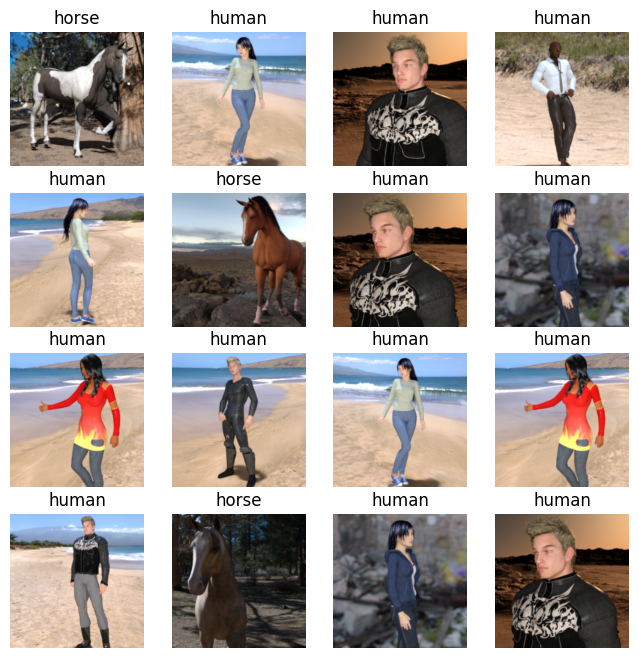

In [20]:
import matplotlib.pyplot as plt
import random

label_map = {
    0 : 'horse',
    1 : 'human'
}

random_idx = np.random.randint(0, len(images), size=16)
plt.figure(figsize=(8, 8))
for i, idx in enumerate(random_idx):
    img = images[idx]
    label_idx = labels[idx]
    label = label_map[label_idx]

    plt.subplot(4, 4, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.show()

In [21]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(3*224*224, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=150528, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2, bias=True)
  )
)


In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=2e-6)

In [23]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device).float(), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 3 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [24]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device).float(), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [25]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataset_loader, model, loss_fn, optimizer)
    test(test_dataset_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.694815  [   32/ 1027]
loss: 0.692704  [  128/ 1027]
loss: 0.693116  [  224/ 1027]
loss: 0.698758  [  320/ 1027]
loss: 0.694693  [  416/ 1027]
loss: 0.696187  [  512/ 1027]
loss: 0.691301  [  608/ 1027]
loss: 0.690353  [  704/ 1027]
loss: 0.692369  [  800/ 1027]
loss: 0.690117  [  896/ 1027]
loss: 0.694718  [  992/ 1027]
Test Error: 
 Accuracy: 51.2%, Avg loss: 0.691784 

Epoch 2
-------------------------------
loss: 0.689163  [   32/ 1027]
loss: 0.704960  [  128/ 1027]
loss: 0.685781  [  224/ 1027]
loss: 0.689347  [  320/ 1027]
loss: 0.693525  [  416/ 1027]
loss: 0.692571  [  512/ 1027]
loss: 0.692389  [  608/ 1027]
loss: 0.706284  [  704/ 1027]
loss: 0.694492  [  800/ 1027]
loss: 0.701553  [  896/ 1027]
loss: 0.699357  [  992/ 1027]
Test Error: 
 Accuracy: 50.8%, Avg loss: 0.691429 

Epoch 3
-------------------------------
loss: 0.698614  [   32/ 1027]
loss: 0.693485  [  128/ 1027]
loss: 0.702170  [  224/ 1027]
loss: 0.695523  [  320/ 10

In [26]:
# # deep CNN 을 위한 모델을 만들고 
# # 300 을 5번 Dropout 으로 모양을 줄이므로
# # 300 -> 150 -> 75 -> 37 ->18 -> 9 
# # 최종 2개를 분류하여야 하므로 (128, 2)

# class MyCNNModel(nn.Module):

#     def __init__(self):

#         super().__init__()
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
#         self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
#         self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
#         self.conv6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
#         self.conv7 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)

#         self.pooling = nn.MaxPool2d(kernel_size=2, stride=2)

#         self.fc1 = nn.Linear(9 * 9 * 256, 128)
#         self.fc2 = nn.Linear(128, 2)

#         self.dropout25 = nn.Dropout(p=0.25)
#         self.dropout50 = nn.Dropout(p=0.5)

#     def forward(self, data):

#         data = self.conv1(data)
#         data = torch.relu(data)
#         data = self.conv2(data)
#         data = torch.relu(data)
#         data = self.pooling(data)
#         data = self.dropout25(data)

#         data = self.conv3(data)
#         data = torch.relu(data)
#         data = self.conv4(data)
#         data = torch.relu(data)
#         data = self.pooling(data)
#         data = self.dropout25(data)

#         data = self.conv5(data)
#         data = torch.relu(data)
#         data = self.pooling(data)
#         data = self.dropout25(data)

#         data = self.conv6(data)
#         data = torch.relu(data)
#         data = self.pooling(data)
#         data = self.dropout25(data)

#         data = self.conv7(data)
#         data = torch.relu(data)
#         data = self.pooling(data)
#         data = self.dropout25(data)

#         data = data.view(-1, 9 * 9 * 256)

#         data = self.fc1(data)
#         data = torch.relu(data)
#         data = self.dropout50(data)

#         logits = self.fc2(data)

#         return logits

# model = MyCNNModel().to(device)
# print(model)

In [27]:
# # model = MyCNNModel().to(DEVICE)

# loss_function = nn.CrossEntropyLoss()

# optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [28]:
from torchvision import transforms, models

pretrained_model = models.vit_b_16(weights=models.ViT_B_16_Weights.DEFAULT)

print(pretrained_model)

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [29]:
class MyTransferLearningModel(torch.nn.Module):

    def __init__(self, pretrained_model, feature_extractor):

        super().__init__()

        if (feature_extractor):
            for param in pretrained_model.parameters():
                param.require_grad = False

        # vision transformer 에서의 classifier 부분은 heads 로 지정
        pretrained_model.heads = torch.nn.Sequential(
            torch.nn.Linear(pretrained_model.heads[0].in_features, 128),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.5),
            torch.nn.Linear(128, 2)
        )

        self.model = pretrained_model

    def forward(self, data):

        logits = self.model(data)

        return logits

In [30]:
feature_extractor = False  # True: Feature Extractor,  False: Fine Tuning

model = MyTransferLearningModel(pretrained_model, feature_extractor).to(device)

loss_function = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 1e-6)

In [31]:
def model_train(dataloader, model, loss_function, optimizer):

    model.train()

    train_loss_sum = train_correct = train_total = 0

    total_train_batch = len(dataloader)

    for images, labels in dataloader:

        x_train = images.to(device).float()
        y_train = labels.to(device)

        outputs = model(x_train)
        loss = loss_function(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_sum += loss.item()

        train_total += y_train.size(0)
        train_correct += ((torch.argmax(outputs, 1)==y_train)).sum().item()

    train_avg_loss = train_loss_sum / total_train_batch
    train_avg_accuracy = 100*train_correct / train_total

    return (train_avg_loss, train_avg_accuracy)

In [32]:

def model_evaluate(dataloader, model, loss_function, optimizer):

    model.eval()

    with torch.no_grad():

        val_loss_sum = val_correct = val_total = 0

        total_val_batch = len(dataloader)

        for images, labels in dataloader:

            x_val = images.to(device).float()
            y_val = labels.to(device)

            outputs = model(x_val)
            loss = loss_function(outputs, y_val)

            val_loss_sum += loss.item()

            val_total += y_val.size(0)
            val_correct += ((torch.argmax(outputs, 1)==y_val)).sum().item()

        val_avg_loss = val_loss_sum / total_val_batch
        val_avg_accuracy = 100*val_correct / val_total

    return (val_avg_loss, val_avg_accuracy)

In [33]:

from datetime import datetime

train_loss_list = []
train_accuracy_list = []

val_loss_list = []
val_accuracy_list = []

start_time = datetime.now()
EPOCHS = 100

for epoch in range(EPOCHS):

    #==============  model train  ================
    train_avg_loss, train_avg_accuracy = model_train(train_dataset_loader, model, loss_fn, optimizer)

    train_loss_list.append(train_avg_loss)
    train_accuracy_list.append(train_avg_accuracy)
    #=============================================

    #============  model evaluation  ==============
    val_avg_loss, val_avg_accuracy = model_evaluate(test_dataset_loader, model, loss_fn, optimizer)

    val_loss_list.append(val_avg_loss)
    val_accuracy_list.append(val_avg_accuracy)
    #============  model evaluation  ==============

    print('epoch:', '%02d' % (epoch + 1),
          'train loss =', '{:.3f}'.format(train_avg_loss), 'train acc =', '{:.3f}'.format(train_avg_accuracy),
          'val loss =', '{:.3f}'.format(val_avg_loss), 'val acc =', '{:.3f}'.format(val_avg_accuracy))

end_time = datetime.now()

print('elapsed time => ', end_time-start_time)

c:\Users\euiso\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


epoch: 01 train loss = 0.690 train acc = 51.315 val loss = 0.651 val acc = 68.750
epoch: 02 train loss = 0.607 train acc = 73.807 val loss = 0.590 val acc = 85.156
epoch: 03 train loss = 0.528 train acc = 89.971 val loss = 0.530 val acc = 94.922
epoch: 04 train loss = 0.434 train acc = 96.884 val loss = 0.463 val acc = 99.609
epoch: 05 train loss = 0.349 train acc = 99.318 val loss = 0.394 val acc = 100.000
epoch: 06 train loss = 0.274 train acc = 99.903 val loss = 0.323 val acc = 100.000
epoch: 07 train loss = 0.211 train acc = 100.000 val loss = 0.264 val acc = 100.000
epoch: 08 train loss = 0.162 train acc = 99.903 val loss = 0.215 val acc = 100.000
epoch: 09 train loss = 0.128 train acc = 100.000 val loss = 0.177 val acc = 100.000
epoch: 10 train loss = 0.101 train acc = 100.000 val loss = 0.148 val acc = 100.000
epoch: 11 train loss = 0.084 train acc = 100.000 val loss = 0.125 val acc = 100.000
epoch: 12 train loss = 0.069 train acc = 100.000 val loss = 0.108 val acc = 100.000
epo

In [34]:
def model_test(dataloader, model):

    model.eval()

    with torch.no_grad():

        test_loss_sum = 0
        test_correct=0
        test_total = 0

        total_test_batch = len(dataloader)

        for images, labels in dataloader:

            x_test = images.to(device).float()
            y_test = labels.to(device)

            outputs = model(x_test)
            loss = loss_fn(outputs, y_test)

            test_loss_sum += loss.item()

            test_total += y_test.size(0)
            test_correct += ((torch.argmax(outputs, 1)==y_test)).sum().item()

        test_avg_loss = test_loss_sum / total_test_batch
        test_avg_accuracy = 100*test_correct / test_total

        print('accuracy:', test_avg_accuracy)
        print('loss:', test_avg_loss)

In [35]:
# test dataset 으로 정확도 및 오차 테스트

model_test(test_dataset_loader, model)

accuracy: 100.0
loss: 0.0045272051938809454


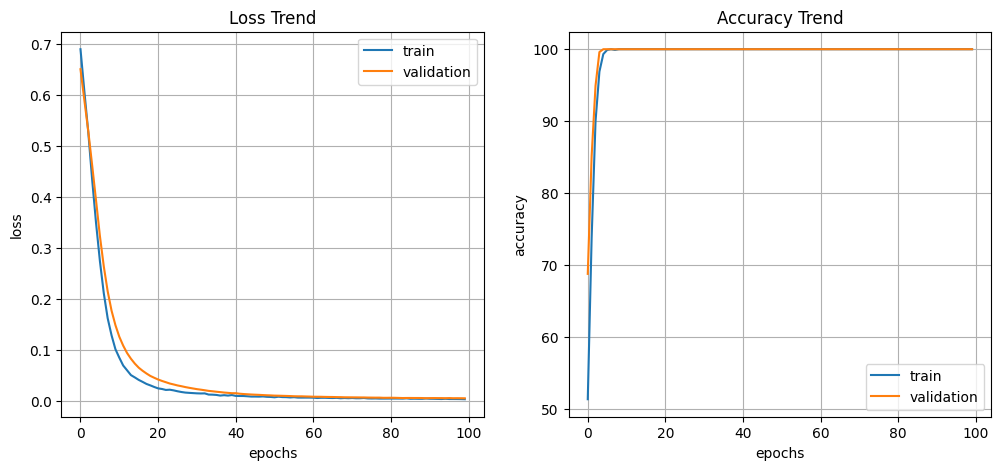

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(train_loss_list, label='train')
plt.plot(val_loss_list, label='validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(train_accuracy_list, label='train')
plt.plot(val_accuracy_list, label='validation')
plt.legend()

plt.show()

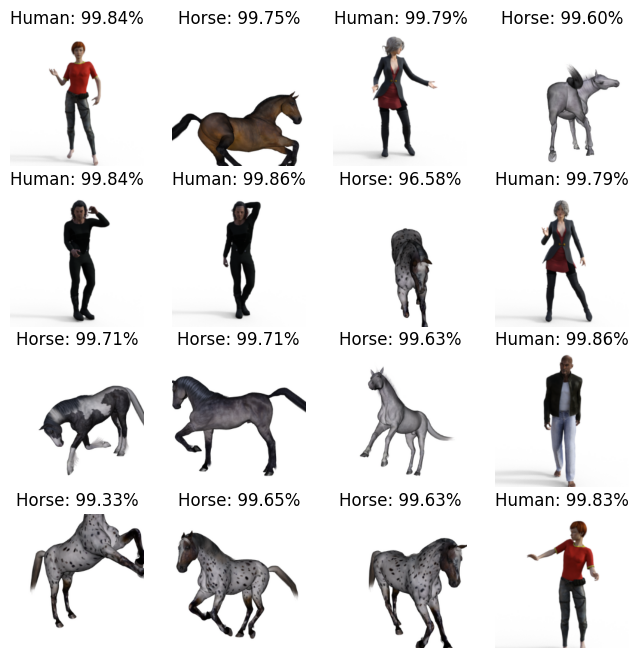

In [37]:
# 모델을 GPU로 이동 (CUDA 사용 여부 확인)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

images , labels = next(iter(test_dataset_loader))
images = images.to(device).float()
labels = labels.to(device)

label_map = {
    0 : 'Horse',
    1 : 'Human',
}

plt.figure(figsize=(8, 8))
rows, cols = 4, 4
for i in range(1, rows*cols+1) :
  img = images[i]
  label_idx = labels[i].item()
  label = label_map[label_idx]
  outputs = model(images[i].unsqueeze(dim=0))
  _, prediction = torch.max(outputs, 1)
  probabilities = torch.nn.functional.softmax(outputs, dim=1)
  probability = '{0:0.2f}'.format(100*probabilities[0, prediction].item())

  plt.subplot(rows, cols, i)
  plt.imshow(img.cpu().permute(1, 2, 0).numpy(), 'gray')
  plt.title('{}: {}%' .format(label, probability))
  plt.axis('off')
plt.show()